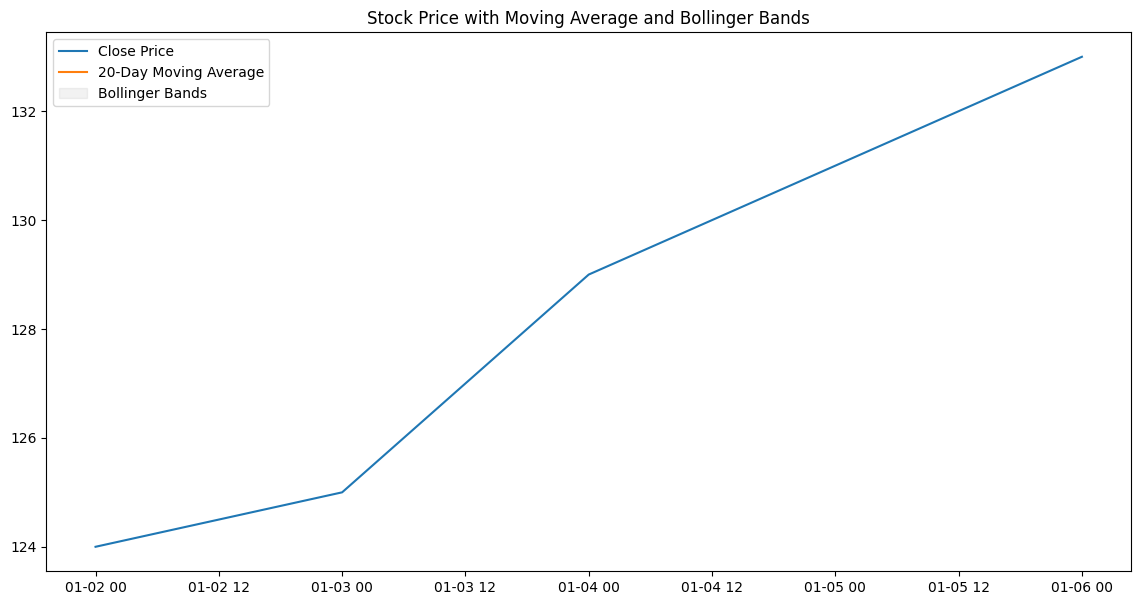

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the financial data into a DataFrame
df = pd.read_csv('financial_data.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as the index
df.set_index('Date', inplace=True)

# Calculate the daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate the 20-day moving average of the closing prices
df['20-Day_MA'] = df['Close'].rolling(window=20).mean()

# Calculate the 20-day standard deviation
df['20-Day_STD'] = df['Close'].rolling(window=20).std()

# Plot the closing prices along with the moving average and the Bollinger Bands
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['20-Day_MA'], label='20-Day Moving Average')

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = df['20-Day_MA'] + (df['20-Day_STD'] * 2)
df['Lower_Band'] = df['20-Day_MA'] - (df['20-Day_STD'] * 2)

plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='gray', alpha=0.1, label='Bollinger Bands')
plt.legend(loc='best')
plt.title('Stock Price with Moving Average and Bollinger Bands')
plt.show()

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  250.080002  251.250000  244.410004  248.419998  248.419998   
2024-01-03  244.979996  245.679993  236.320007  238.449997  238.449997   
2024-01-04  239.250000  242.699997  237.729996  237.929993  237.929993   
2024-01-05  236.860001  240.119995  234.899994  237.490005  237.490005   
2024-01-08  236.139999  241.250000  235.300003  240.449997  240.449997   
2024-01-09  238.110001  238.960007  232.039993  234.960007  234.960007   
2024-01-10  235.100006  235.500000  231.289993  233.940002  233.940002   
2024-01-11  230.570007  230.929993  225.369995  227.220001  227.220001   
2024-01-12  220.080002  225.339996  217.149994  218.889999  218.889999   
2024-01-16  215.100006  223.490005  212.179993  219.910004  219.910004   

               Volume  
Date                   
2024-01-02  104654200  
2024-01-03  121082600  
2024-01-04  102

<Axes: title={'center': 'TSLA Stock Price and Moving Average'}, xlabel='Date'>

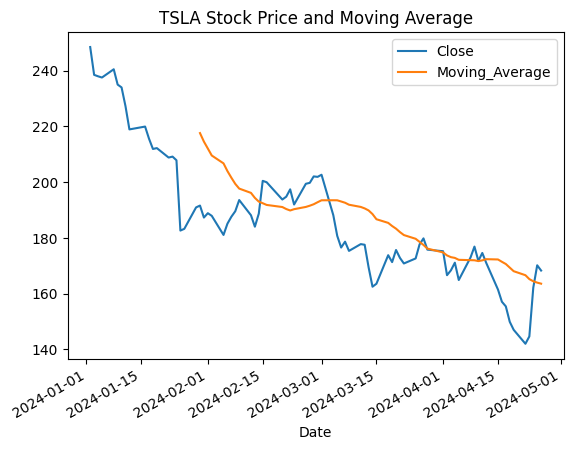

In [3]:
import yfinance as yf

# Define the ticker symbol and the time frame for which you want the data
ticker_symbol = 'TSLA'
start_date = '2024-01-01'
end_date = '2024-04-27'

# Download the historical stock data
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(stock_data.head(10))

# Calculate the daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Calculate the moving average of the closing prices
stock_data['Moving_Average'] = stock_data['Close'].rolling(window=20).mean()

# Plot the closing prices and the moving average
stock_data[['Close', 'Moving_Average']].plot(title=f"{ticker_symbol} Stock Price and Moving Average")